In [1]:
import os
import time
import pandas as pd

In [2]:
import papermill as pm

In [3]:
from sklearn.model_selection import ParameterGrid
from sklearn_evaluation import NotebookCollection

In [4]:
input_directory = "./inputs/"
output_directory = "./outputs/"

os.makedirs(output_directory, exist_ok=True)

sample_name = "2_DT_2_CD45plus_dense"

## Grid of Parameters

In [5]:
# param_grid = {
#     "input_directory": [input_directory],
#     "output_directory": [output_directory],
#     "sample_name": [sample_name],    
#     "hvg_n_top_genes": [2000, 5000],
#     "pca_n_comps": [30, 50],
#     "n_neighbors": [20, 30]
# }

# experiments = list(ParameterGrid(param_grid))

In [6]:
param_grid = {
    "input_directory": [input_directory],
    "output_directory": [output_directory],
    "sample_name": [sample_name],    
    "hvg_n_top_genes": list(range(1000, 6000, 1000)),
    "pca_n_comps": list(range(50, 150, 50)),
    "n_neighbors": list(range(20, 40, 10))
}

experiments = list(ParameterGrid(param_grid))

In [7]:
pd.DataFrame(experiments)

,hvg_n_top_genes,input_directory,n_neighbors,output_directory,pca_n_comps,sample_name
0,1000,./inputs/,20,./outputs/,50,2_DT_2_CD45plus_dense
1,1000,./inputs/,20,./outputs/,100,2_DT_2_CD45plus_dense
2,1000,./inputs/,30,./outputs/,50,2_DT_2_CD45plus_dense
3,1000,./inputs/,30,./outputs/,100,2_DT_2_CD45plus_dense
4,2000,./inputs/,20,./outputs/,50,2_DT_2_CD45plus_dense
5,2000,./inputs/,20,./outputs/,100,2_DT_2_CD45plus_dense
6,2000,./inputs/,30,./outputs/,50,2_DT_2_CD45plus_dense
7,2000,./inputs/,30,./outputs/,100,2_DT_2_CD45plus_dense
8,3000,./inputs/,20,./outputs/,50,2_DT_2_CD45plus_dense
9,3000,./inputs/,20,./outputs/,100,2_DT_2_CD45plus_dense


## Add Experiment ID

In [8]:
for id, param in enumerate(experiments, start=1):
    param["experiment_id"] = f"{id:03d}"

In [9]:
df_experiments = pd.DataFrame(experiments) \
    .set_index("experiment_id") \
    .drop(columns=["input_directory", "output_directory"])

df_experiments

,hvg_n_top_genes,n_neighbors,pca_n_comps,sample_name
experiment_id,,,,
001,1000,20,50,2_DT_2_CD45plus_dense
002,1000,20,100,2_DT_2_CD45plus_dense
003,1000,30,50,2_DT_2_CD45plus_dense
004,1000,30,100,2_DT_2_CD45plus_dense
005,2000,20,50,2_DT_2_CD45plus_dense
006,2000,20,100,2_DT_2_CD45plus_dense
007,2000,30,50,2_DT_2_CD45plus_dense
008,2000,30,100,2_DT_2_CD45plus_dense
009,3000,20,50,2_DT_2_CD45plus_dense


## Set Up Parallelism

In [10]:
import ray

ray.init(num_cpus = 5)

2021-08-13 08:51:54,319	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.2.167',
 'raylet_ip_address': '192.168.2.167',
 'redis_address': '192.168.2.167:6379',
 'object_store_address': '/tmp/ray/session_2021-08-13_08-51-52_806510_66171/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-08-13_08-51-52_806510_66171/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-08-13_08-51-52_806510_66171',
 'metrics_export_port': 49633,
 'node_id': '990a46ced0107e8ff44baab905c9a30d7543fd1e30eb5109d5c3d580'}

In [11]:
@ray.remote
def run_notebook(param):
        
    path_notebook = os.path.join(
        output_directory, f"{sample_name}.{param['experiment_id']}.ipynb"
    )

    pm.execute_notebook(
        "analysis.template.ipynb",
        output_path=path_notebook,
        parameters=param,
        progress_bar=False
    )

    return path_notebook

In [12]:
futures = [run_notebook.remote(param) for param in experiments]

## Run Experiments

In [13]:
start_time = time.time()

path_notebooks = ray.get(futures)

print("elapsed: ", (time.time() - start_time) / 60, "min")

elapsed:  5.133148352305095 min


## Clean Up Default Parameters from Notebooks

In [14]:
import nbformat
from tqdm import tqdm

for path_notebook in tqdm(path_notebooks):
    
    nb = nbformat.read(path_notebook, as_version=nbformat.NO_CONVERT)

    index = None

    # find index for the cell with the injected params
    for i, c in enumerate(nb.cells):
        cell_tags = c.metadata.get('tags')
        if cell_tags:
            if "parameters" in cell_tags:
                index = i
                break

    # remove cell
    if index is not None:
        nb.cells.pop(index)

    # save modified notebook
    nbformat.write(nb, path_notebook)

100%|██████████| 20/20 [00:01<00:00, 10.96it/s]


## Load All Experiment Notebooks

In [15]:
nbs = NotebookCollection(
    paths=path_notebooks,
    ids=[param["experiment_id"] for param in experiments]
)

In [16]:
nbs

In [17]:
list(nbs)

['hvg', 'cluster']

## Compare HVG

In [18]:
nbs["hvg"]

## Compare Cluster

In [19]:
nbs["cluster"]

## Specific Experiment

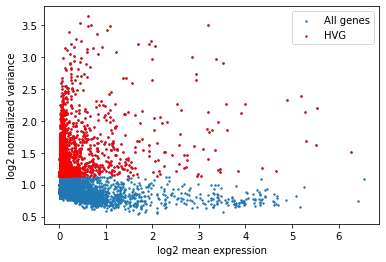

In [20]:
nbs["hvg"]["007"]

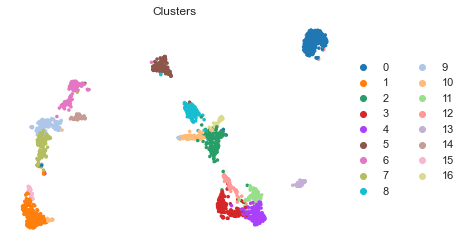

In [21]:
nbs["cluster"]["007"]

In [22]:
df_experiments.loc["007"]

hvg_n_top_genes                     2000
n_neighbors                           30
pca_n_comps                           50
sample_name        2_DT_2_CD45plus_dense
Name: 007, dtype: object

Link to the notebook: [Experiment 007](outputs/2_DT_2_CD45plus_dense.007.ipynb)